# Empirical analysis of performance data


Statistical tests and basic models to interpret our results !

Total : 90 subjects
89 subjects remaining after removing problematic subjects.
A total of 1557/9790 actions were missed. (15.90 %)
(89, 3)


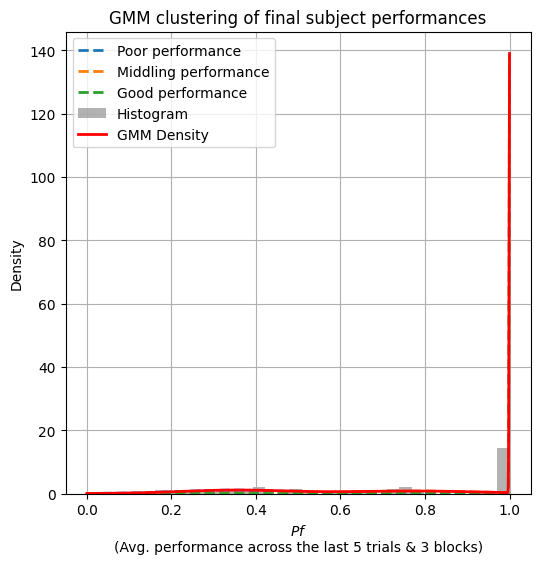

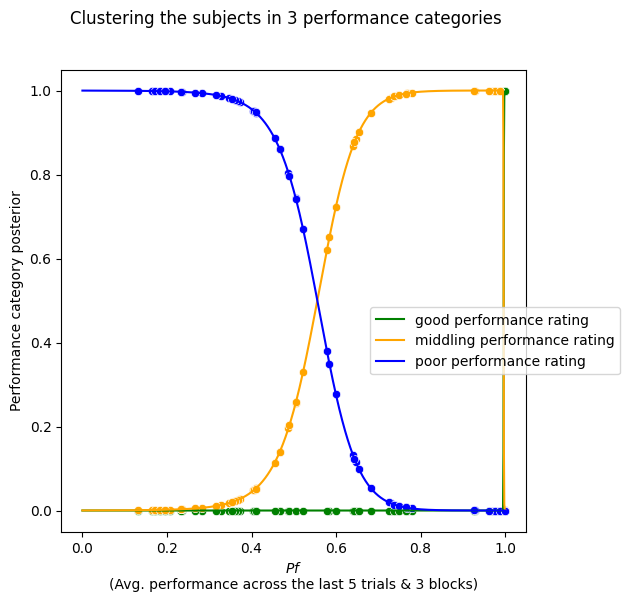

c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\analysis_tools\dataframe_from_raw_data.py:348: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


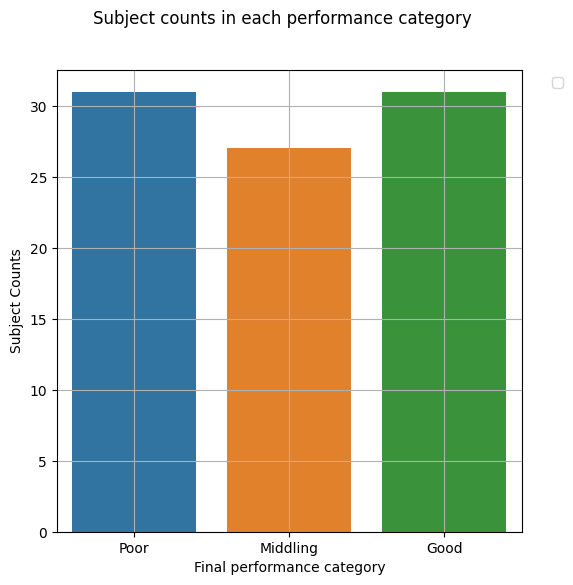

 - Loaded the task results for study 66f96c31e69227986334a027 
    (16 subjects.)
 - Loaded the task results for study 66d086503c0a69291c361b67 
    (40 subjects.)
Total : 56 subjects
55 subjects remaining after removing problematic subjects.
A total of 14/6050 actions were missed. (0.23 %)
 - Loaded the task results for study 6703ab18d345eaa4893587e0 
    (49 subjects.)
 - Loaded the task results for study 66f9aee8210357265a5958fc 
    (50 subjects.)
 - Loaded the task results for study 6703ab1a7ea30557549dc6da 
    (50 subjects.)
Total : 149 subjects
145 subjects remaining after removing problematic subjects.
A total of 33/15950 actions were missed. (0.21 %)
(200, 3)


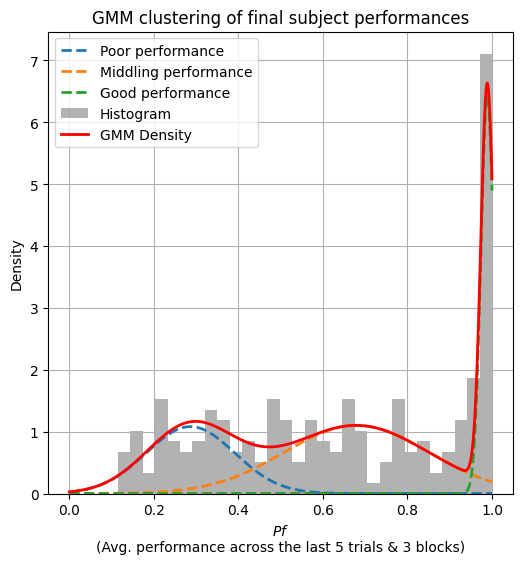

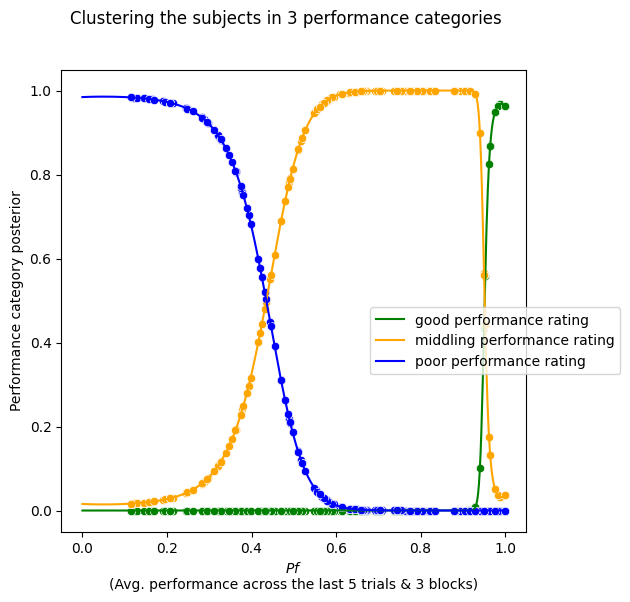

c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\analysis_tools\dataframe_from_raw_data.py:348: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


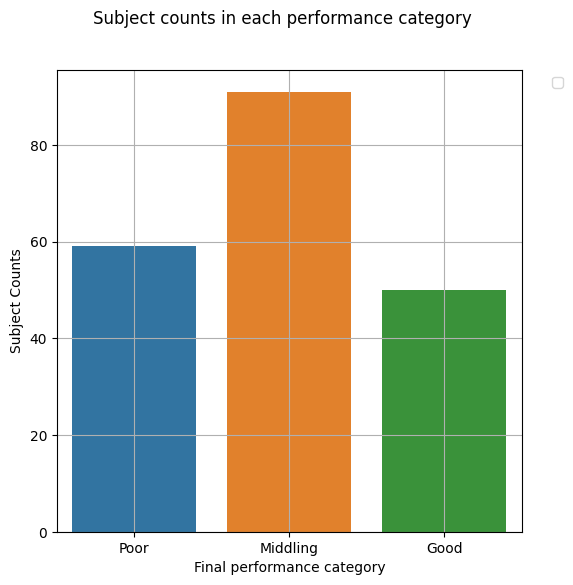

Index(['subject_id', 'task_code', 'lang', 'browser', 'N_trials', 'N_tmstps',
       'start_date', 'finish_date', 'finished_clock', 'completedTask',
       'N_exited_fullscreen', 'N_missed_actions', 'canvas_explore_points',
       'mandatory_q1', 'mandatory_q2', 'optional_q1', 'optional_q2',
       'optional_q3', 'canvas_size', 'Submission id', 'Participant id',
       'Status', 'Custom study tncs accepted at', 'Started at', 'Completed at',
       'Reviewed at', 'Archived at', 'Time taken', 'Completion code',
       'Total approvals', 'Fluent languages', 'Age', 'Sex',
       'Ethnicity simplified', 'Country of birth', 'Country of residence',
       'Nationality', 'Language', 'Student status', 'Employment status',
       'Nationality_red', 'feedback_noise_std',
       'application_measured_timetaken', 'question_0', 'question_1',
       'question_2', 'question_3', 'question_4', 'question_5', 'question_6',
       'question_7', 'raw_feedback_values', 'raw_realtime_values',
       'realtime_

In [5]:

import sys,os
import pickle

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly as pltly
import plotly.express as px
import plotly.graph_objects as go

from sklearn.mixture import GaussianMixture

from jax import vmap
import jax.numpy as jnp

# + local functions : 
from database_handling.database_extract import get_all_subject_data_from_internal_task_id
from utils import remove_by_indices
from analysis_tools.preprocess import get_preprocessed_data_from_df
from analysis_tools.dataframe_from_raw_data import get_full_dataframe_from_raw_data

LAST_T_TIMESTEPS = 5
LAST_K_TRIALS = 3

LLM_CLASSIFS_PATH = os.path.join("results","llm_classifications","cluster_11_03.data")

STUDIES_EXTRACTION_CODES_1 = {
    "study_1" : {
        "dict_code" : "002",
        "internal_task_id" : "002",
        "studies_id" : None,
        "exclude_subjects" : ["5c9cb670b472d0001295f377"],
        "feedback_noise_bins" : [0,0.2,0.4,1]
    }
}
subjects_df_1 = get_full_dataframe_from_raw_data(STUDIES_EXTRACTION_CODES_1,LLM_CLASSIFS_PATH,LAST_T_TIMESTEPS,LAST_K_TRIALS)


STUDIES_EXTRACTION_CODES_23 = {
    "study_2" : {
        "dict_code" : "003_1",
        "internal_task_id" : "003",
        "studies_id" :  ["66f96c31e69227986334a027","66d086503c0a69291c361b67"],
        "exclude_subjects" : ["615c1741d4630b25e6bc1cb9"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    },
    "study_3" : {
        "dict_code" : "003_2",
        "internal_task_id" : "003",
        "studies_id" : ["6703ab18d345eaa4893587e0","66f9aee8210357265a5958fc","6703ab1a7ea30557549dc6da"],
        "exclude_subjects" : ["611d60c383f4f70ff4bc99fd", "66a74bdfdcaccdc0703894d5",
                              "667d92f2ea5c1542f417285d", "6548f570022275786186ffbd"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    }
}


subjects_df_23,llm_qsts = get_full_dataframe_from_raw_data(STUDIES_EXTRACTION_CODES_23,LLM_CLASSIFS_PATH,LAST_T_TIMESTEPS,LAST_K_TRIALS,return_qsts=True)

full_dataframe = pd.concat([subjects_df_1,subjects_df_23],axis=0,ignore_index=True)
print(full_dataframe.keys())
print(full_dataframe[['Age']].describe())
print(full_dataframe[['application_measured_timetaken']].describe())

c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\analysis_tools\perfplots.py:163: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = plot_this_dataframe.groupby(xcat_name)['final_performance'].mean()
c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\analysis_tools\perfplots.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(ax=axs[0],x=xcat_name, y="final_performance",
c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\analysis_tools\perfplots.py:177: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  ax =

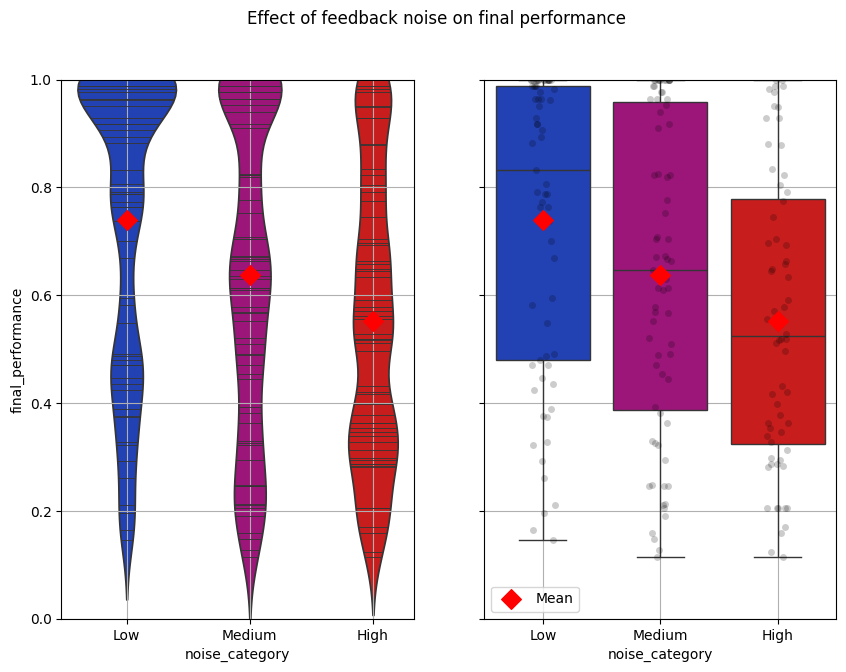

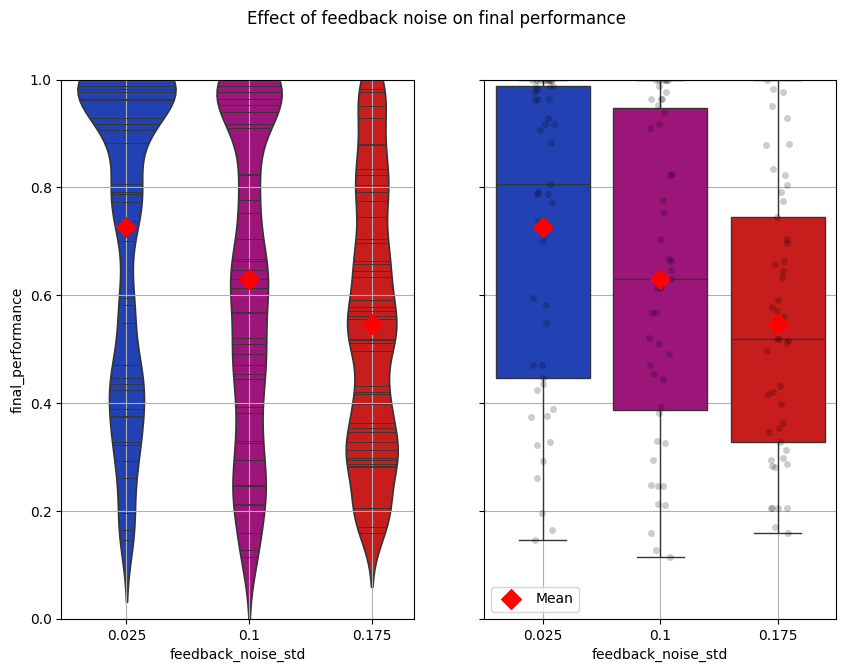

In [7]:
subjects_df_3 = full_dataframe[(full_dataframe["study_name"] == "study_3" )]
subjects_df_23 = full_dataframe[(full_dataframe["study_name"] == "study_3" ) | (full_dataframe["study_name"] == "study_2")]

from analysis_tools.perfplots import perfplot_both

perfplot_both(subjects_df_23,"noise_category")
perfplot_both(subjects_df_3,"feedback_noise_std")


C:\Users\annic\AppData\Local\Temp\ipykernel_12332\2818931668.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df['fp_clip'] = studied_df['final_performance'].clip(1e-5, 1 - 1e-5)
C:\Users\annic\AppData\Local\Temp\ipykernel_12332\2818931668.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df['logit_fp'] = np.log(studied_df['fp_clip'] / (1 - studied_df['fp_clip']))
C:\Users\annic\AppData\Local\Temp\ipykernel_12332\2818931668.py:46: SettingWithCopyWarning: 
A value is trying to be set o

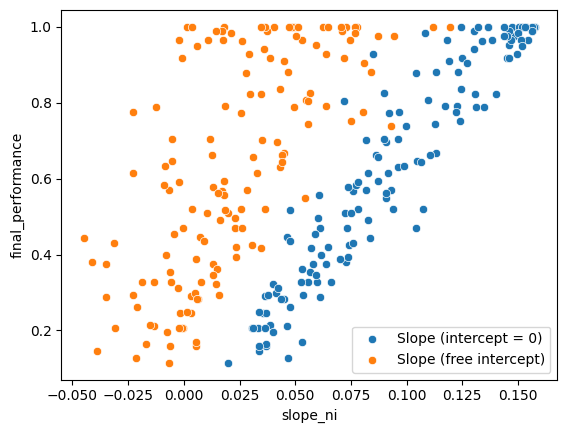

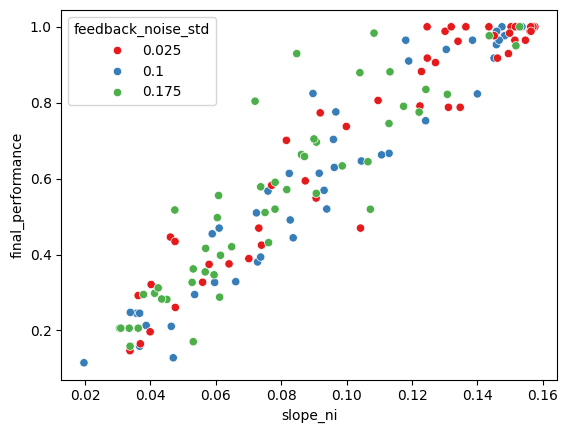

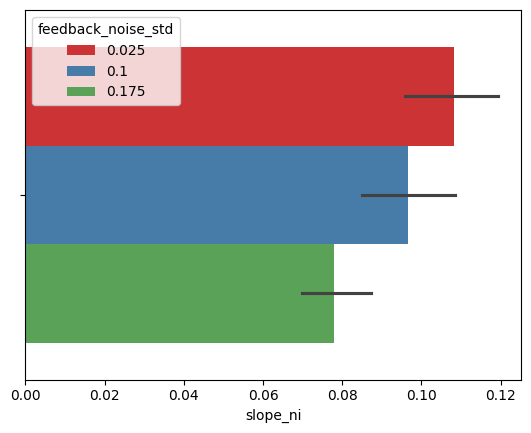

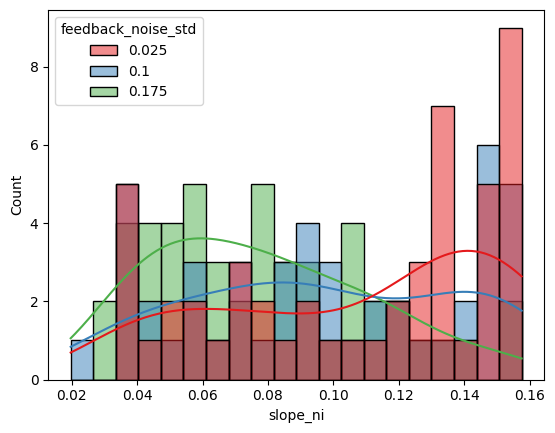

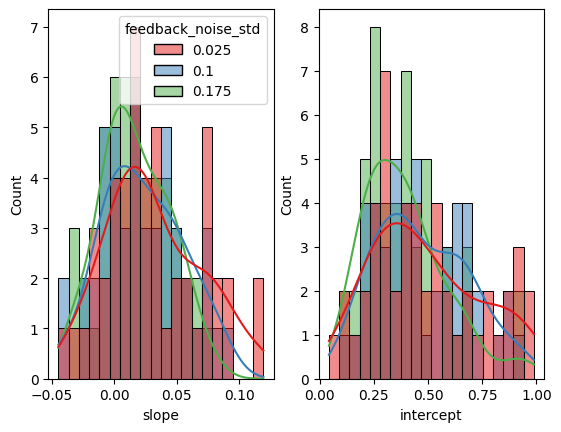

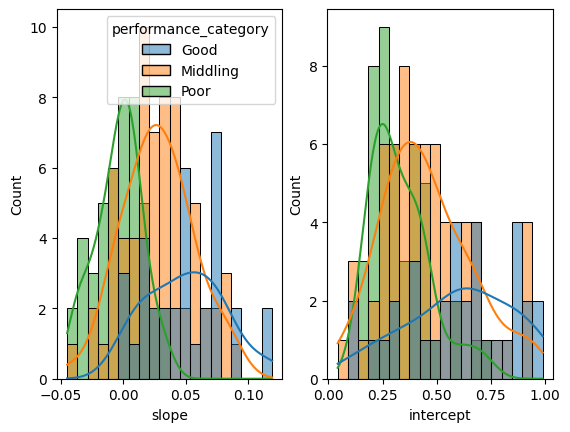

In [ ]:
# Another way of qualifying learners vs non learners : slope !
from scipy.stats import linregress
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
from scipy import stats


subjects_df_3 = full_dataframe[(full_dataframe["study_name"] == "study_3" )]
subjects_df_23 = full_dataframe[(full_dataframe["study_name"] == "study_3" ) | (full_dataframe["study_name"] == "study_2")]

studied_df = subjects_df_3

studied_df['fp_clip'] = studied_df['final_performance'].clip(1e-5, 1 - 1e-5)
studied_df['logit_fp'] = np.log(studied_df['fp_clip'] / (1 - studied_df['fp_clip']))

def calculate_regression(x, y,label = None):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    if label is None :
        return pd.Series({
            'slope': slope,
            'intercept': intercept,
            'r_squared': r_value ** 2
        })
    else :
        return pd.Series({
            'slope_{}'.format(label): slope,
            'intercept_{}'.format(label): intercept,
            'r_squared_{}'.format(label): r_value ** 2
        })

def calculate_regression_no_intercept(x, y,label = None):
    # Fit a model without adding a constant (intercept is implicitly 0)
    model = sm.OLS(y, x).fit()
    if label is None :
        return pd.Series({
            'slope_ni': model.params[0],
            'r_squared': model.rsquared
        })
    else :            
        return pd.Series({
            'slope_ni_{}'.format(label): model.params[0],
            'r_squared_ni_{}'.format(label): model.rsquared
        })
    
studied_df["final_block_performance"] = studied_df["norm_distance_to_goal"].apply(lambda x : list(np.mean(1.0 -x[:-1,-LAST_T_TIMESTEPS:],-1))) 
df_regression = studied_df.apply(lambda row: calculate_regression(np.arange(10), row['final_block_performance']), axis=1)
df_regression_no_intercept = studied_df.apply(lambda row: calculate_regression_no_intercept(np.arange(10), row['final_block_performance']), axis=1)
all_regression_results = pd.concat([df_regression,df_regression_no_intercept],axis=1)
studied_df = pd.concat([studied_df,all_regression_results],axis=1)


fig,ax = plt.subplots(1,1)
sns.scatterplot(ax = ax, data = studied_df, x = 'slope_ni' , y="final_performance",label="Slope (intercept = 0)")
sns.scatterplot(ax = ax,data = studied_df, x = 'slope' , y="final_performance",label="Slope (free intercept)")
plt.show()



fig,ax = plt.subplots(1,1)
sns.scatterplot(ax = ax, data = studied_df, x = 'slope_ni' , y="final_performance",hue='feedback_noise_std',palette="Set1")
# sns.scatterplot(ax = ax,data = studied_df, x = 'slope' , y="final_performance",hue='feedback_noise_std',palette="Set1")
plt.show()

fig,ax = plt.subplots(1,1)
sns.barplot(ax = ax, data = studied_df, x = 'slope_ni' ,hue='feedback_noise_std',palette="Set1")
plt.show()

fig,ax = plt.subplots(1,1)
sns.histplot(ax = ax, data = studied_df, x = 'slope_ni' ,hue='feedback_noise_std',palette="Set1",kde=True,bins=20)
plt.show()

fig,axs = plt.subplots(1,2)
sns.histplot(ax = axs[0], data = studied_df, x = 'slope' ,hue='feedback_noise_std',palette="Set1",kde=True,bins=20)
sns.histplot(ax = axs[1], data = studied_df, x = 'intercept' ,hue='feedback_noise_std',palette="Set1",kde=True,bins=20)
axs[1].get_legend().remove()
plt.show()

fig,axs = plt.subplots(1,2)
sns.histplot(ax = axs[0], data = studied_df, x = 'slope' ,hue='performance_category',kde=True,bins=20)

sns.histplot(ax = axs[1], data = studied_df, x = 'intercept' ,hue='performance_category',kde=True,bins=20)
axs[1].get_legend().remove()
plt.show()

C:\Users\annic\AppData\Local\Temp\ipykernel_12332\3468097403.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_perfs_by_group = list(studied_df.groupby('noise_category')['final_performance'])


Low ShapiroResult(statistic=np.float64(0.8375630507103982), pvalue=np.float64(8.645594950473115e-06))
Medium ShapiroResult(statistic=np.float64(0.912692364928372), pvalue=np.float64(0.0018776028407208657))
High ShapiroResult(statistic=np.float64(0.952281456384317), pvalue=np.float64(0.045707710468501465))


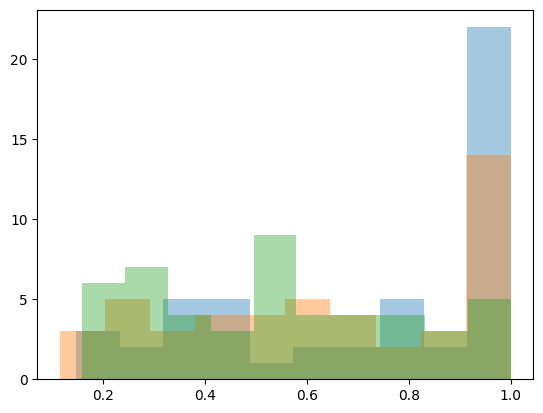

In [116]:
from scipy.stats import shapiro

# Plotting and difference testing for study 3 :
studied_df = full_dataframe[(full_dataframe["study_name"] == "study_3" )]


# FInal performance : differences between experimental groups :
final_perfs_by_group = list(studied_df.groupby('noise_category')['final_performance'])       
final_perfs_by_group_dict = {cat:np.array(perfs) for (cat,perfs) in final_perfs_by_group}                      


# The data have not been generated by a normal distribution ! 
for noise_category,subject_array in  final_perfs_by_group_dict.items():
    normality = shapiro(subject_array)
    print(noise_category,normality)
    plt.hist(subject_array,10,alpha=0.4)

The data have not been generated by a normal distribution ! 

To make between group comparisons, we need to use an alternative test like the Kriska Wallis test (compare all 3 conditions at once) or a pairwise test such as the Mann-Whitney U Test or Dunn's Test. (Post Hoc)

In [119]:
from scipy.stats import kruskal
import scikit_posthocs as sp


studied_df = full_dataframe[(full_dataframe["study_name"] == "study_2" )|(full_dataframe["study_name"] == "study_3" )]
studied_df = full_dataframe[(full_dataframe["study_name"] == "study_3" )]

for study in ["study_1","study_2","study_3"]:
    print("{} ###############################################################################".format(study))
    print('FINAL PERFORMANCES -------------------------------------------------------------------')
    
    studied_df = full_dataframe[(full_dataframe["study_name"] == study )]
    
    # Final performance : differences between experimental groups :
    final_perfs_by_group = list(studied_df.groupby('noise_category')['final_performance'])       
    final_perfs_by_group_dict = {cat:np.array(perfs) for (cat,perfs) in final_perfs_by_group}    

    h_stat, p_value = kruskal(final_perfs_by_group_dict["Low"],final_perfs_by_group_dict["Medium"],final_perfs_by_group_dict["High"],'raise')

    print("Kruskal Wallis test :")
    print(f"H-statistic: {h_stat}, p-value: {p_value}")

    # Post hoc test with Dunn's test :
    # Using the posthoc_dunn() function
    p_values = sp.posthoc_dunn([final_perfs_by_group_dict["Low"],final_perfs_by_group_dict["Medium"],final_perfs_by_group_dict["High"]], p_adjust = 'bonferroni')

    print("\nPost-hoc Dunn's test :")
    print(p_values)


    print('INITIAL PERFORMANCES -------------------------------------------------------------------')


    # FInal performance : differences between experimental groups :
    init_perfs_by_group = list(studied_df.groupby('noise_category')['initial_performance'])       
    init_perfs_by_group_dict = {cat:np.array(perfs) for (cat,perfs) in init_perfs_by_group}    

    h_stat, p_value = kruskal(init_perfs_by_group_dict["Low"],init_perfs_by_group_dict["Medium"],init_perfs_by_group_dict["High"],'raise')

    print("Kruskal Wallis test :")
    print(f"H-statistic: {h_stat}, p-value: {p_value}")

    # Post hoc test with Dunn's test :
    # Using the posthoc_dunn() function
    p_values = sp.posthoc_dunn([init_perfs_by_group_dict["Low"],init_perfs_by_group_dict["Medium"],init_perfs_by_group_dict["High"]], p_adjust = 'bonferroni')
    print("\nPost-hoc Dunn's test :")
    print(p_values)

    print('BLIND TRIAL PERFORMANCES -------------------------------------------------------------------')

    blind_perfs_by_group = list(studied_df.groupby('noise_category')['blind_trial_performance'])       
    blind_perfs_by_group_dict = {cat:np.array(perfs) for (cat,perfs) in blind_perfs_by_group}    

    h_stat, p_value = kruskal(blind_perfs_by_group_dict["Low"],blind_perfs_by_group_dict["Medium"],blind_perfs_by_group_dict["High"],'raise')

    print("Kruskal Wallis test :")
    print(f"H-statistic: {h_stat}, p-value: {p_value}")

    # Post hoc test with Dunn's test :
    # Using the posthoc_dunn() function
    p_values = sp.posthoc_dunn([blind_perfs_by_group_dict["Low"],blind_perfs_by_group_dict["Medium"],blind_perfs_by_group_dict["High"]], p_adjust = 'bonferroni')

    print("\nPost-hoc Dunn's test :")
    print(p_values)

study_1 ###############################################################################
FINAL PERFORMANCES -------------------------------------------------------------------
Kruskal Wallis test :
H-statistic: 10.09838569392045, p-value: 0.017748070581455475

Post-hoc Dunn's test :
          1         2         3
1  1.000000  1.000000  0.032648
2  1.000000  1.000000  0.129108
3  0.032648  0.129108  1.000000
INITIAL PERFORMANCES -------------------------------------------------------------------
Kruskal Wallis test :
H-statistic: 8.013442670085585, p-value: 0.045734701640786884

Post-hoc Dunn's test :
          1         2         3
1  1.000000  0.490678  1.000000
2  0.490678  1.000000  0.074968
3  1.000000  0.074968  1.000000
BLIND TRIAL PERFORMANCES -------------------------------------------------------------------
Kruskal Wallis test :
H-statistic: 6.361587823412912, p-value: 0.09528391215931337

Post-hoc Dunn's test :
          1         2         3
1  1.000000  1.000000  0.257723


C:\Users\annic\AppData\Local\Temp\ipykernel_12332\1795088498.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_perfs_by_group = list(studied_df.groupby('noise_category')['final_performance'])
C:\Users\annic\AppData\Local\Temp\ipykernel_12332\1795088498.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  init_perfs_by_group = list(studied_df.groupby('noise_category')['initial_performance'])
C:\Users\annic\AppData\Local\Temp\ipykernel_12332\1795088498.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

There is no significant differences between Low and Medium or Medium and Low noises. The only significant group difference is between Low and High noises ($p<0.01$)

We failed to find significant diffferences between conditions at training start, indicating that the learning led to significant differences between the (initially similar) subjects.

The results for the blind trial confirm the results for the 'final_performances' data.

## GLMs to predict final / blind block performances :




C:\Users\annic\AppData\Local\Temp\ipykernel_12332\1402640584.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df['fp_clip'] = studied_df[predicted_quantity].clip(eps, 1 - eps)
C:\Users\annic\AppData\Local\Temp\ipykernel_12332\1402640584.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df['logit_fp'] = np.log(studied_df['fp_clip'] / (1 - studied_df['fp_clip']))


                 Generalized Linear Model Regression Results                  
Dep. Variable:               logit_fp   No. Observations:                  145
Model:                            GLM   Df Residuals:                      140
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                          5.8087
Method:                          IRLS   Log-Likelihood:                -330.76
Date:                Thu, 13 Mar 2025   Deviance:                       813.22
Time:                        17:04:25   Pearson chi2:                     813.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1597
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

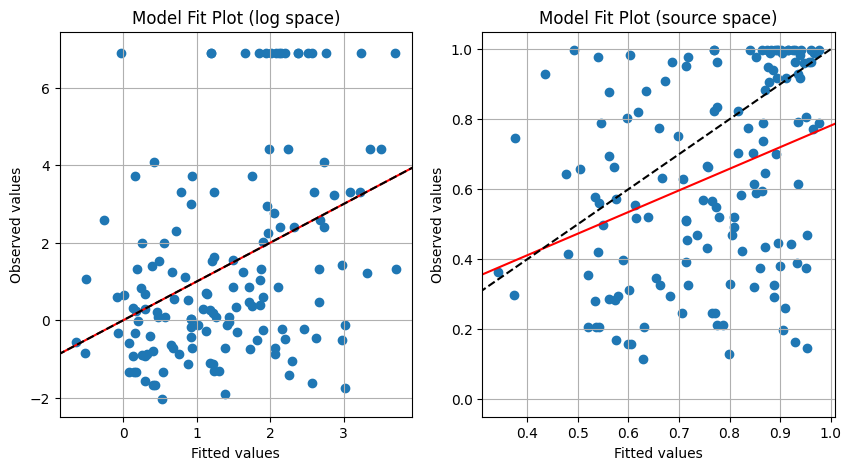

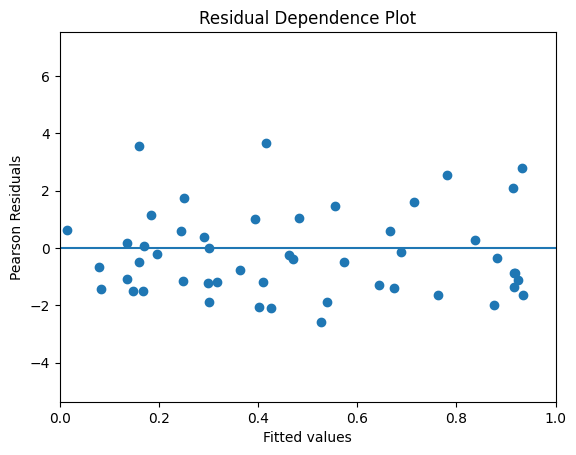

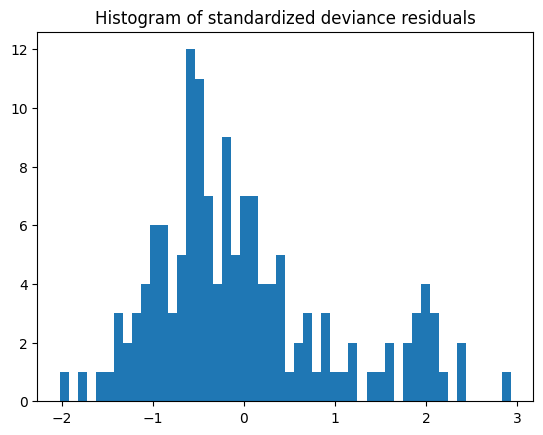

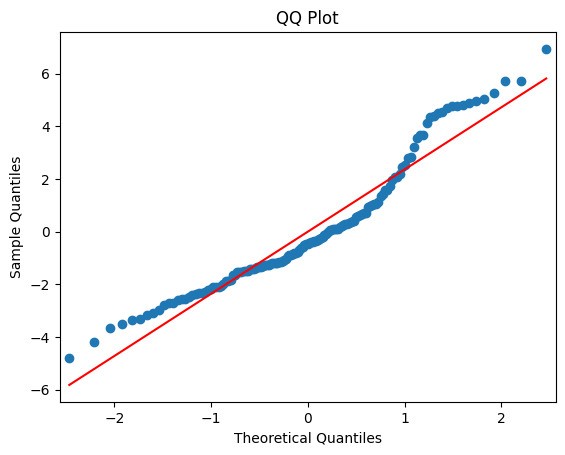

C:\Users\annic\AppData\Local\Temp\ipykernel_12332\1402640584.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df['pred_logit'] = result.predict(studied_df)
C:\Users\annic\AppData\Local\Temp\ipykernel_12332\1402640584.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df['pred_y'] = 1 / (1 + np.exp(-studied_df['pred_logit']))


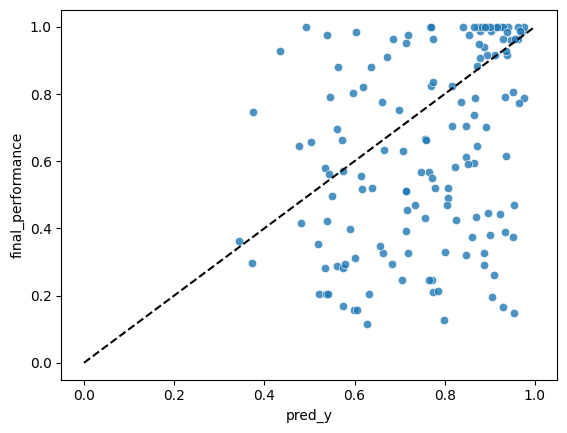

In [121]:
from scipy import stats
from statsmodels import graphics

def sigmoid(z):
    return 1/(1 + np.exp(-z))

studied_df = full_dataframe[(full_dataframe["study_name"] == "study_3" )]

predicted_quantity = 'final_performance'

eps = 1e-3
studied_df['fp_clip'] = studied_df[predicted_quantity].clip(eps, 1 - eps)
studied_df['logit_fp'] = np.log(studied_df['fp_clip'] / (1 - studied_df['fp_clip']))

# Adding this makes the GLM better but it's probably cheating :p :
model = smf.glm(formula='logit_fp ~ Age + C(noise_category) + initial_performance', data=studied_df, family=sm.families.Gaussian())
result = model.fit()

# Print summary of the model
print(result.summary())
print('Parameters  :\n', result.params)
print('T-values:\n', result.tvalues)

logy = studied_df['logit_fp']
logyhat = result.mu
y = studied_df['fp_clip']
yhat = sigmoid(logyhat)

fig, axs = plt.subplots(1,2,figsize=(10,5))
for ax in axs :
    # ax.set_ylim([0,1])
    # ax.set_xlim([0,1])
    ax.grid()

ax = axs[0]
ax.scatter(logyhat, logy)
line_fit = sm.OLS(logy, sm.add_constant(logyhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax,color="red")
ax.set_title('Model Fit Plot (log space)')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');
ax.plot(np.linspace(-2,7,100),(np.linspace(-2,7,100)),color='black',linestyle='--')

ax = axs[1]
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax,color="red")
ax.set_title('Model Fit Plot (source space)')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');
ax.plot(np.linspace(0,1,100),(np.linspace(0,1,100)),color='black',linestyle='--')

plt.show()



fig, ax = plt.subplots()
ax.scatter(logyhat, result.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')
plt.show()



fig, ax = plt.subplots()
resid = result.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=50)
ax.set_title('Histogram of standardized deviance residuals');
plt.show()



graphics.gofplots.qqplot(resid, line='r')
plt.title("QQ Plot")
plt.show()





studied_df['pred_logit'] = result.predict(studied_df)
studied_df['pred_y'] = 1 / (1 + np.exp(-studied_df['pred_logit']))

sns.scatterplot(data = studied_df,x="pred_y",y="final_performance",alpha=0.8)
plt.plot(np.linspace(0,1,100),(np.linspace(0,1,100)),color='black',linestyle='--')





## GLMMs to characterize learning curves :




                   subject_id                     task_code lang browser  \
144  65b90328586c915db8b1c1be  003+6703ab18d345eaa4893587e0   en  OPERA    
144  65b90328586c915db8b1c1be  003+6703ab18d345eaa4893587e0   en  OPERA    
144  65b90328586c915db8b1c1be  003+6703ab18d345eaa4893587e0   en  OPERA    
144  65b90328586c915db8b1c1be  003+6703ab18d345eaa4893587e0   en  OPERA    
144  65b90328586c915db8b1c1be  003+6703ab18d345eaa4893587e0   en  OPERA    

     N_trials  N_tmstps                  start_date  \
144        11        10  2024-10-07 11:39:26.943000   
144        11        10  2024-10-07 11:39:26.943000   
144        11        10  2024-10-07 11:39:26.943000   
144        11        10  2024-10-07 11:39:26.943000   
144        11        10  2024-10-07 11:39:26.943000   

                    finish_date  finished_clock  completedTask  ...  \
144  2024-10-07 11:46:45.054000          438109           True  ...   
144  2024-10-07 11:46:45.054000          438109           True  ...   

C:\Users\annic\AppData\Local\Temp\ipykernel_12332\2858090042.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df["final_trial_performance"] = studied_df["norm_distance_to_goal"].apply(lambda x : list(np.mean(1.0 -x[:-1,-LAST_T_TIMESTEPS:],-1)))
C:\Users\annic\AppData\Local\Temp\ipykernel_12332\2858090042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df["trial"] = studied_df['final_trial_performance'].apply(lambda a: list(range(len(a))))


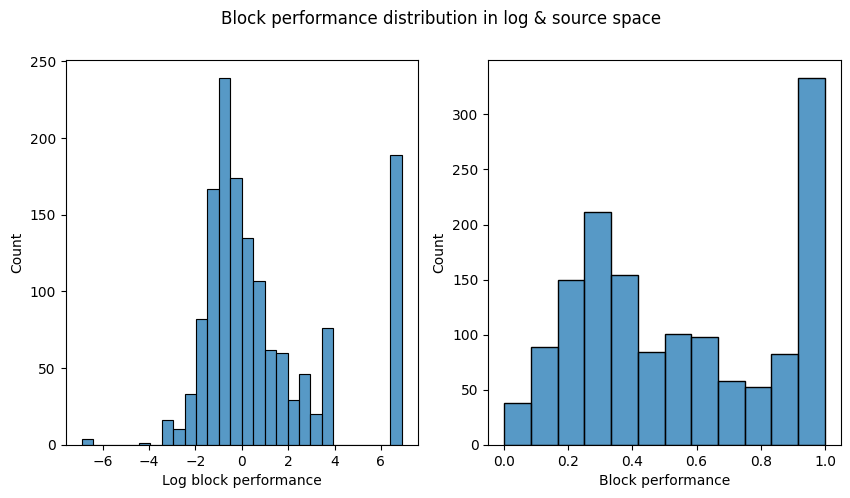

               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    logit_fp  
No. Observations:      1450       Method:                REML      
No. Groups:            145        Scale:                 3.3909    
Min. group size:       10         Log-Likelihood:        -3117.3949
Max. group size:       10         Converged:             Yes       
Mean group size:       10.0                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.366    0.338  1.083 0.279 -0.297  1.030
feedback_noise_std       -3.923    2.880 -1.362 0.173 -9.568  1.722
trial                     0.357    0.032 11.134 0.000  0.294  0.420
feedback_noise_std:trial -1.417    0.273 -5.189 0.000 -1.952 -0.882
Group Var                 3.402    0.253                       

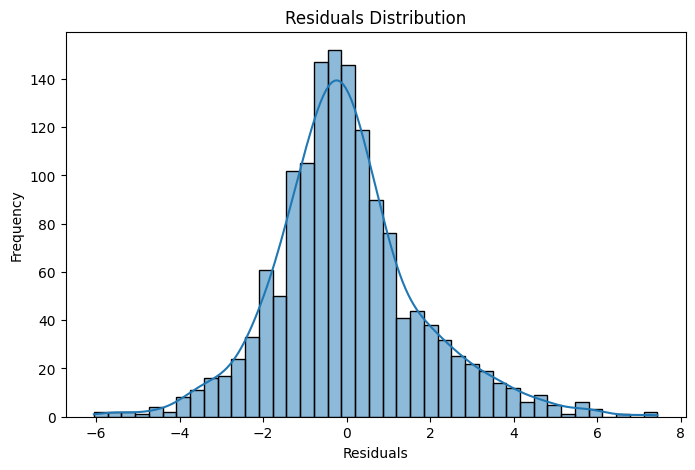

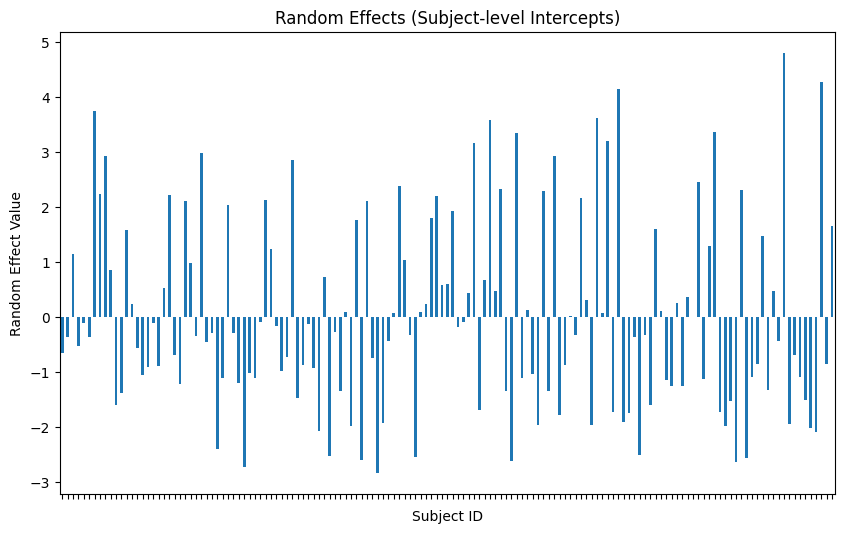

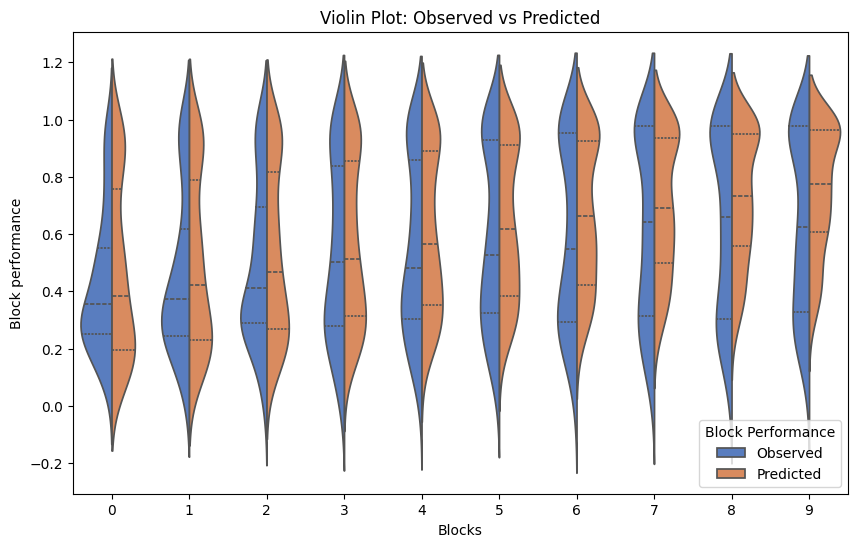

In [104]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

studied_df = full_dataframe[(full_dataframe["study_name"] == "study_3" )]

studied_df["final_trial_performance"] = studied_df["norm_distance_to_goal"].apply(lambda x : list(np.mean(1.0 -x[:-1,-LAST_T_TIMESTEPS:],-1)))
studied_df["trial"] = studied_df['final_trial_performance'].apply(lambda a: list(range(len(a))))


df_exploded = studied_df.explode(['final_trial_performance',"trial"])
df_exploded['final_trial_performance'] = (df_exploded['final_trial_performance']).astype(float)
df_exploded['trial'] = pd.to_numeric(df_exploded['trial'], errors='raise')
df_exploded["approvals"] = df_exploded["Total approvals"]

print(df_exploded.head())


eps = 1e-3
df_exploded['fp_clip'] = df_exploded['final_trial_performance'].clip(eps, 1 - eps)
df_exploded['logit_fp'] = np.log(df_exploded['fp_clip'] / (1 - df_exploded['fp_clip']))


fig,axs=plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Block performance distribution in log & source space")
ax = axs[0]
sns.histplot(ax=ax,data=df_exploded,x="logit_fp")
ax.set_xlabel("Log block performance")
ax = axs[1]
sns.histplot(ax=ax,data=df_exploded,x="fp_clip")
ax.set_xlabel("Block performance")
plt.show()


# We are clearly in longitudinal data territory, let's apply a GLMM to the task !
model = smf.mixedlm(
    "logit_fp ~ feedback_noise_std * trial",  # Fixed effects
    df_exploded,
    groups=df_exploded["subject_id"],  # Random intercept per subject
    re_formula="1"  # Random intercept only
)
result = model.fit()
# Output the model summary
print(result.summary())


# Plot residuals to check for any patterns (model diagnostics)
residuals = result.resid
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Random effects plot
random_effects = result.random_effects
random_effects_df = pd.DataFrame(random_effects).T

# Plot random effects by subject
random_effects_df.plot(kind="bar", figsize=(10, 6), legend=False)
plt.title("Random Effects (Subject-level Intercepts)")
plt.ylabel("Random Effect Value")
plt.xlabel("Subject ID")
plt.xticks(rotation=45)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.show()

# Generate predictions from the model for plotting
predicted_perfs = result.fittedvalues


df_exploded['Observed'] = df_exploded['fp_clip']

df_exploded['Predicted'] = (sigmoid(predicted_perfs))

# Scatter plot of observed vs predicted counts
# plt.figure(figsize=(8, 6))
# plt.scatter(df_exploded['trial'], df_exploded['fp_clip'], color='blue', label='Observed', alpha=0.1)
# plt.scatter(df_exploded['trial'], sigmoid(predicted_perfs), color='red', label='Predicted', alpha=0.1)
# plt.xlabel("trial")
# plt.ylabel("final_trial_performance")
# plt.legend()
# plt.title("Observed vs Predicted Counts")
# plt.show()

# Prepare data for the violin plot
df_long = pd.melt(df_exploded, id_vars=['subject_id', 'trial', 'feedback_noise_std'], value_vars=['Observed', 'Predicted'], 
                  var_name='Block Performance', value_name='value')

# Create a violin plot with split halves based on the 'type' column (observed vs predicted)
plt.figure(figsize=(10, 6))
sns.violinplot(x='trial', y='value',hue="Block Performance", data=df_long, split=True, inner='quart', palette='muted')
plt.title('Violin Plot: Observed vs Predicted')
plt.xlabel('Blocks')
plt.ylabel('Block performance')
plt.show()


# plt.figure(figsize=(10, 6))
# sns.violinplot(x='trial', y='fp_clip', data=df_exploded, split=True, inner="quart", palette="Set2")

# # Customize the plot
# plt.title("Violin Plot with Two Halves Based on Grouping")
# plt.xlabel("Group")
# plt.ylabel("Age Distribution")

# plt.show()

# print('Parameters  :\n', result.params)
# print('T-values:\n', result.tvalues)


# y = df_exploded['logit_ftp']
# yhat = result.mu


# fig, ax = plt.subplots()
# ax.scatter(yhat, y)
# line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
# abline_plot(model_results=line_fit, ax=ax)
# ax.set_title('Model Fit Plot (log space)')
# ax.set_ylabel('Observed values')
# ax.set_xlabel('Fitted values');
# plt.show()


# fig, ax = plt.subplots()
# ax.scatter(yhat, result.resid_pearson)
# ax.hlines(0, 0, 1)
# ax.set_xlim(0, 1)
# ax.set_title('Residual Dependence Plot')
# ax.set_ylabel('Pearson Residuals')
# ax.set_xlabel('Fitted values')
# plt.show()

# from scipy import stats

# fig, ax = plt.subplots()
# resid = result.resid_deviance.copy()
# resid_std = stats.zscore(resid)
# ax.hist(resid_std, bins=25)
# ax.set_title('Histogram of standardized deviance residuals');
# plt.show()


# from statsmodels import graphics
# graphics.gofplots.qqplot(resid, line='r')
# plt.show()





# df_exploded['pred_logit'] = result.predict(df_exploded)
# df_exploded['pred_y'] = 1 / (1 + np.exp(-df_exploded['pred_logit']))

# sns.scatterplot(data = df_exploded,x="pred_y",y="final_trial_performance",alpha=0.1)
# plt.plot(np.linspace(0,1,100),(np.linspace(0,1,100)))

Adding random slopes per subject :

C:\Users\annic\AppData\Local\Temp\ipykernel_12332\3236963934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df["final_trial_performance"] = studied_df["norm_distance_to_goal"].apply(lambda x : list(np.mean(1.0 -x[:-1,-LAST_T_TIMESTEPS:],-1)))
C:\Users\annic\AppData\Local\Temp\ipykernel_12332\3236963934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df["trial"] = studied_df['final_trial_performance'].apply(lambda a: list(range(len(a))))


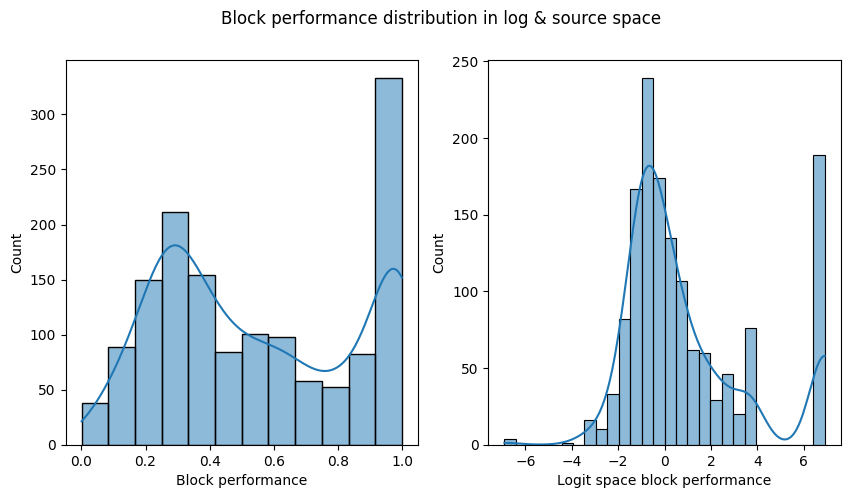

               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    logit_fp  
No. Observations:      1450       Method:                REML      
No. Groups:            145        Scale:                 2.9045    
Min. group size:       10         Log-Likelihood:        -3056.8030
Max. group size:       10         Converged:             Yes       
Mean group size:       10.0                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.366    0.259  1.416 0.157 -0.141  0.874
feedback_noise_std       -3.923    2.204 -1.780 0.075 -8.242  0.396
trial                     0.357    0.047  7.569 0.000  0.265  0.450
feedback_noise_std:trial -1.417    0.402 -3.527 0.000 -2.204 -0.630
Group Var                 1.674    0.197                       

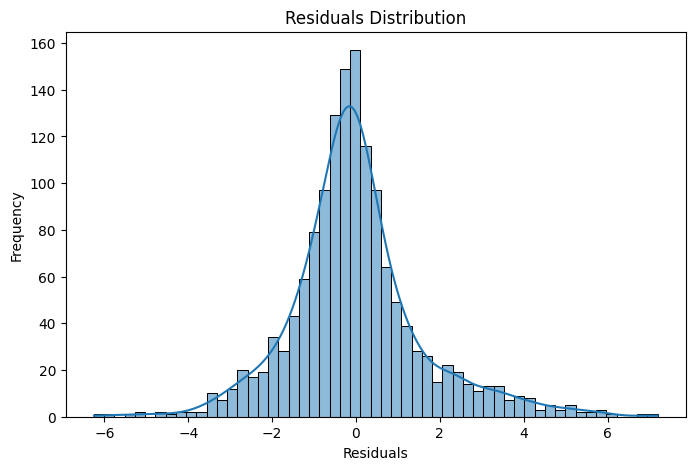

                        index     Group     trial
0    563f734bcbd4c60005dc9442 -0.273951 -0.093316
1    58fe4354d66f6400016dc206  0.113909 -0.125558
2    5b3158ba532e3d00018e324a  0.545865  0.143738
3    5b7877430aeff10001f1b162 -0.967712  0.130467
4    5c4f4ce19eeaf00001598126 -0.168092  0.016803
..                        ...       ...       ...
140  66cf306107ad4fcf4bef6f2f -1.084508 -0.220953
141  66d44c9f7c80416603a39dc5 -0.857432 -0.304367
142  66dbd9310cb151de6b920b00  3.132759  0.232392
143  670000de059e282083d65068 -0.608557 -0.051965
144  6702724366ac1372a287cfd0  0.829073  0.196136

[145 rows x 3 columns]


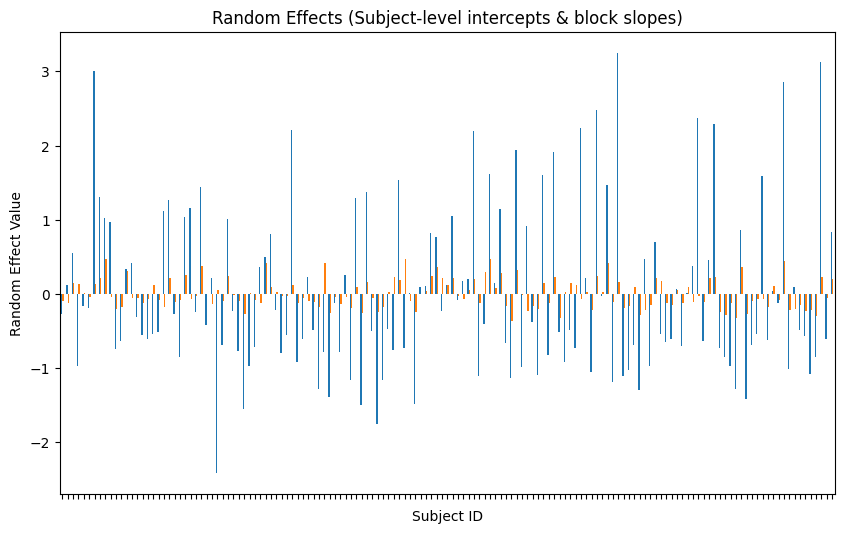

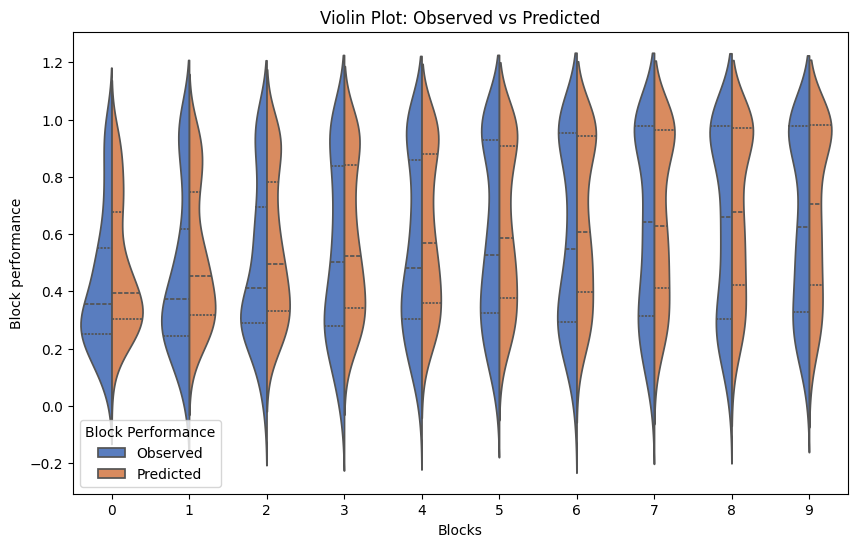

C:\Users\annic\AppData\Local\Temp\ipykernel_12332\3236963934.py:107: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\annic\AppData\Local\Temp\ipykernel_12332\3236963934.py:124: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    logit_fp  
No. Observations:      1450       Method:                REML      
No. Groups:            145        Scale:                 2.9045    
Min. group size:       10         Log-Likelihood:        -3056.8030
Max. group size:       10         Converged:             Yes       
Mean group size:       10.0                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.366    0.259  1.416 0.157 -0.141  0.874
feedback_noise_std       -3.923    2.204 -1.780 0.075 -8.242  0.396
trial                     0.357    0.047  7.569 0.000  0.265  0.450
feedback_noise_std:trial -1.417    0.402 -3.527 0.000 -2.204 -0.630
Group Var                 1.674    0.197                       

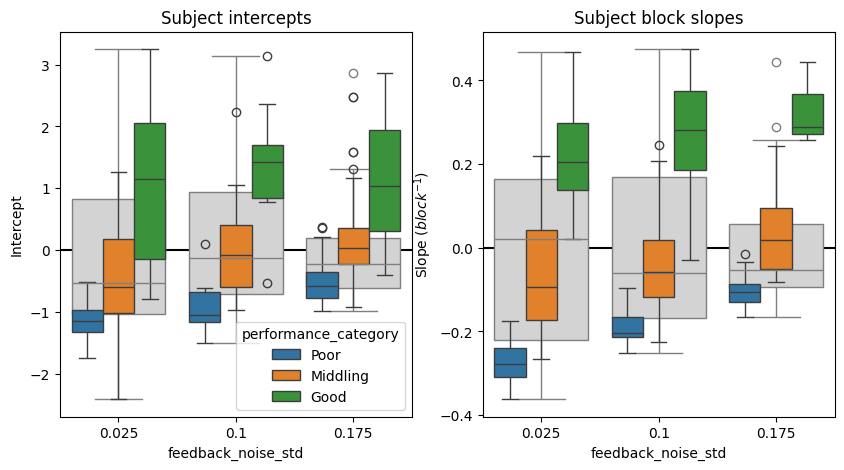

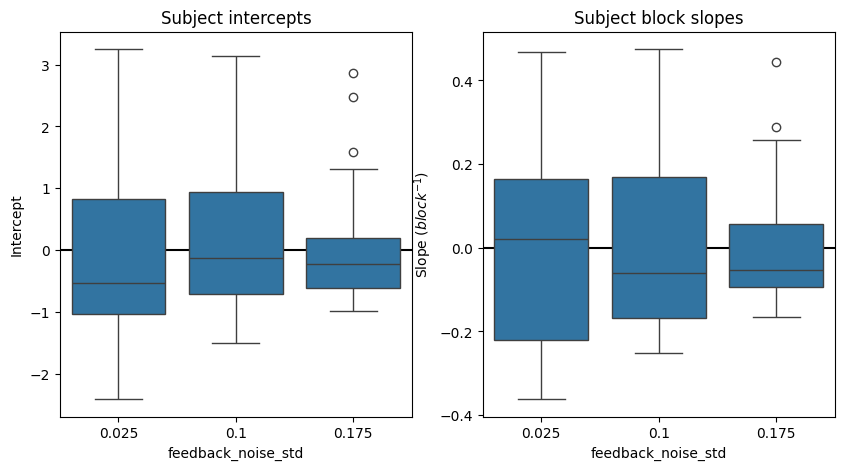

In [155]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

studied_df = full_dataframe[(full_dataframe["study_name"] == "study_3" )]

studied_df["final_trial_performance"] = studied_df["norm_distance_to_goal"].apply(lambda x : list(np.mean(1.0 -x[:-1,-LAST_T_TIMESTEPS:],-1)))
studied_df["trial"] = studied_df['final_trial_performance'].apply(lambda a: list(range(len(a))))


df_exploded = studied_df.explode(['final_trial_performance',"trial"])
df_exploded['final_trial_performance'] = (df_exploded['final_trial_performance']).astype(float)
df_exploded['trial'] = pd.to_numeric(df_exploded['trial'], errors='raise')
df_exploded["approvals"] = df_exploded["Total approvals"]
eps = 1e-3
df_exploded['fp_clip'] = df_exploded['final_trial_performance'].clip(eps, 1 - eps)
df_exploded['logit_fp'] = np.log(df_exploded['fp_clip'] / (1 - df_exploded['fp_clip']))


fig,axs=plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Block performance distribution in log & source space")
ax = axs[1]
sns.histplot(ax=ax,data=df_exploded,x="logit_fp",kde=True)
ax.set_xlabel("Logit space block performance")
ax = axs[0]
sns.histplot(ax=ax,data=df_exploded,x="fp_clip",kde=True)
ax.set_xlabel("Block performance")
plt.show()


# We are clearly in longitudinal data territory, let's apply a GLMM to the task !
model = smf.mixedlm(
    "logit_fp ~ feedback_noise_std * trial",  # Fixed effects
    df_exploded,
    groups=df_exploded["subject_id"],  # Random intercept per subject
    re_formula="1 + trial" # Random learning curve per subject, removing the intercept as we may consider every subject starting from the same knowledge base
)
result = model.fit()
# Output the model summary
print(result.summary())


# Plot residuals to check for any patterns (model diagnostics)
residuals = result.resid
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Random effects plot
random_effects = result.random_effects
random_effects_df = pd.DataFrame(random_effects).T.reset_index()
print(random_effects_df)

studied_df = studied_df.merge(random_effects_df,left_on='subject_id',right_on='index')


# Plot random effects by subject
random_effects_df.plot(kind="bar", figsize=(10, 6), legend=False)
plt.title("Random Effects (Subject-level intercepts & block slopes)")
plt.ylabel("Random Effect Value")
plt.xlabel("Subject ID")
plt.xticks(rotation=45)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.show()

# Generate predictions from the model for plotting
predicted_perfs = result.fittedvalues


df_exploded['Observed'] = df_exploded['fp_clip']
df_exploded['Predicted'] = (sigmoid(predicted_perfs))

# Prepare data for the violin plot
df_long = pd.melt(df_exploded, id_vars=['subject_id', 'trial', 'feedback_noise_std'], value_vars=['Observed', 'Predicted'], 
                  var_name='Block Performance', value_name='value')

# Create a violin plot with split halves based on the 'type' column (observed vs predicted)
plt.figure(figsize=(10, 6))
sns.violinplot(x='trial', y='value',hue="Block Performance", data=df_long, split=True, inner='quart', palette='muted')
plt.title('Violin Plot: Observed vs Predicted')
plt.xlabel('Blocks')
plt.ylabel('Block performance')
plt.show()


# Show slopes and intercepts by category : 
hue_order = ["Poor","Middling","Good"]
fig,axs = plt.subplots(1,2,figsize=(10,5))
ax = axs[0]
ax.axhline(0,color="black")
ax.set_title("Subject intercepts")
ax.set_ylabel("Intercept")
sns.boxplot(ax = ax,data = studied_df,x = 'feedback_noise_std', y = 'Group',color="lightgrey")
sns.boxplot(ax = ax,data = studied_df,x = 'feedback_noise_std', y = 'Group', hue="performance_category",hue_order=hue_order)

ax = axs[1]
ax.set_title("Subject block slopes")
ax.set_ylabel("Slope ($block^{-1}$)")
ax.axhline(0,color="black")
sns.boxplot(ax = ax,data = studied_df,x = 'feedback_noise_std', y = 'trial_y',color="lightgrey")
sns.boxplot(ax = ax,data = studied_df,x = 'feedback_noise_std', y = 'trial_y', hue="performance_category",hue_order=hue_order)
ax.get_legend().remove()
fig.show()


print(result.summary())


fig,axs = plt.subplots(1,2,figsize=(10,5))
ax = axs[0]
ax.axhline(0,color="black")
ax.set_title("Subject intercepts")
ax.set_ylabel("Intercept")
sns.boxplot(ax = ax,data = studied_df,x = 'feedback_noise_std', y = 'Group')
ax = axs[1]
ax.set_title("Subject block slopes")
ax.set_ylabel("Slope ($block^{-1}$)")
ax.axhline(0,color="black")
sns.boxplot(ax = ax,data = studied_df,x = 'feedback_noise_std', y = 'trial_y')
fig.show()

## Using GLMs to predict blind block performance from the first block !

C:\Users\annic\AppData\Local\Temp\ipykernel_12332\337245750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df['fp_clip'] = studied_df['blind_trial_performance'].clip(1e-5, 1 - 1e-5)
C:\Users\annic\AppData\Local\Temp\ipykernel_12332\337245750.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_df['logit_fp'] = np.log(studied_df['fp_clip'] / (1 - studied_df['fp_clip']))
C:\Users\annic\AppData\Local\Temp\ipykernel_12332\337245750.py:21: SettingWithCopyWarning: 
A value is trying to be set 

                 Generalized Linear Model Regression Results                  
Dep. Variable:               logit_fp   No. Observations:                  145
Model:                            GLM   Df Residuals:                      142
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          26.965
Method:                          IRLS   Log-Likelihood:                -443.08
Date:                Wed, 12 Mar 2025   Deviance:                       3829.0
Time:                        16:00:18   Pearson chi2:                 3.83e+03
No. Iterations:                     3   Pseudo R-squ. (CS):            0.08944
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

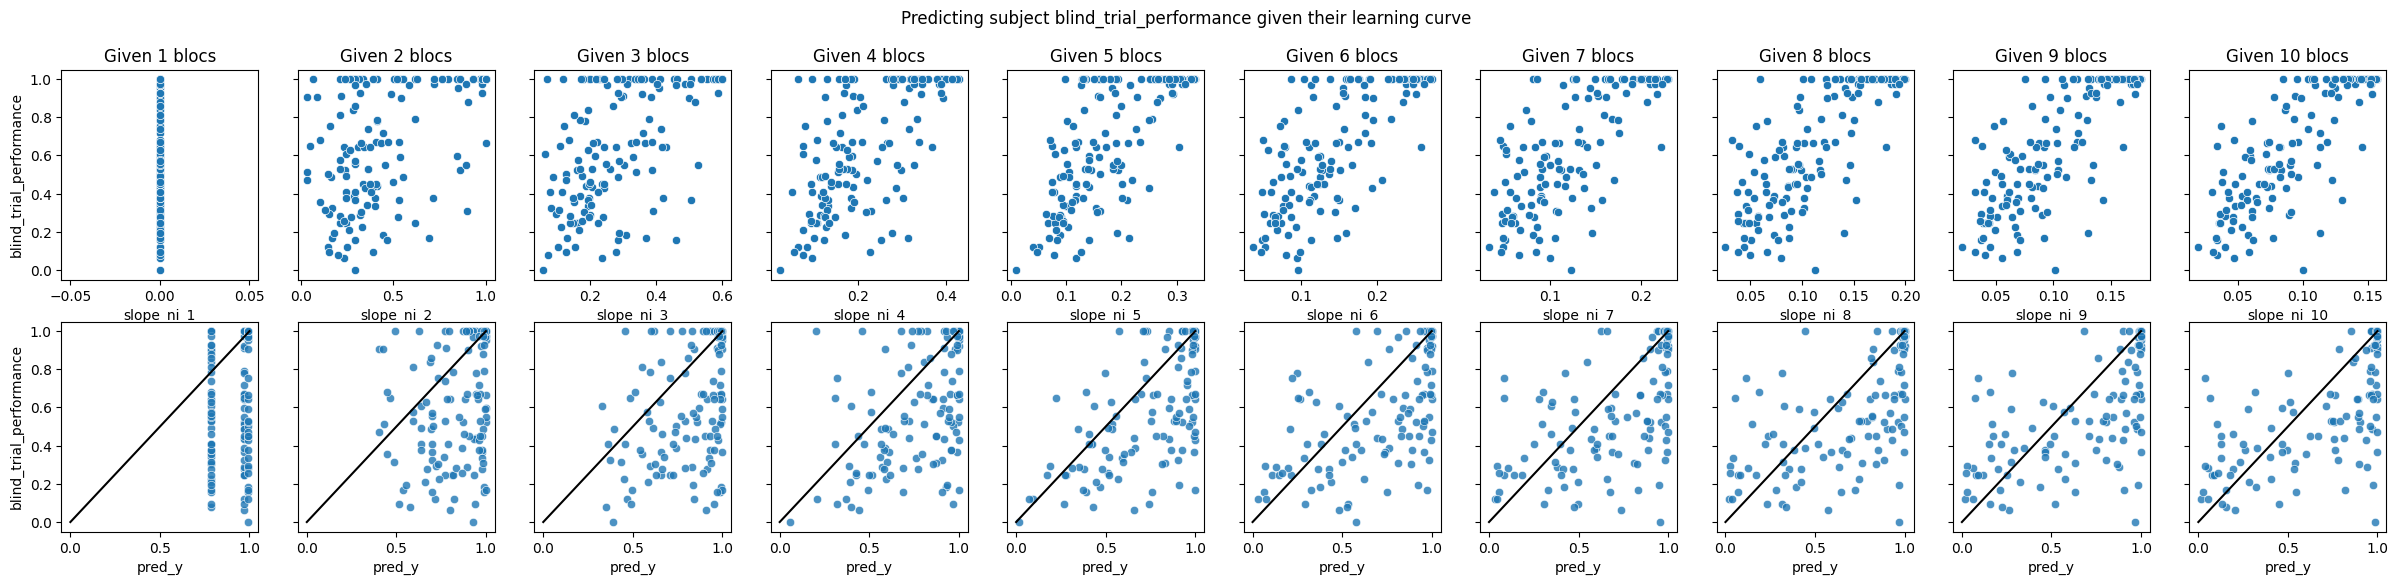

In [43]:
subjects_df_3 = full_dataframe[(full_dataframe["study_name"] == "study_3" )]
subjects_df_23 = full_dataframe[(full_dataframe["study_name"] == "study_3" ) | (full_dataframe["study_name"] == "study_2")]

studied_df = subjects_df_3
studied_df['fp_clip'] = studied_df['blind_trial_performance'].clip(1e-5, 1 - 1e-5)
studied_df['logit_fp'] = np.log(studied_df['fp_clip'] / (1 - studied_df['fp_clip']))

# Can we predict using the initial slope provided by the first T trials ?
Nt = 10

fig,axs = plt.subplots(2,Nt,figsize=(Nt*3,3*2),sharey=True)
fig.suptitle("Predicting subject blind_trial_performance given their learning curve")
for k in range(Nt):
    axcolumn = axs[:,k]
    T = k+1
    
    column_name = "predict_given_{}_trials".format(T)
    axcolumn[0].set_title("Given {} blocs".format(T))
       
    
    studied_df[column_name] = studied_df["norm_distance_to_goal"].apply(lambda x : list(np.mean(1.0 -x[:T,-LAST_T_TIMESTEPS:],-1))) 
    df_regression = studied_df.apply(lambda row: calculate_regression(np.arange(T), row[column_name],T), axis=1)
    df_regression_no_intercept = studied_df.apply(lambda row: calculate_regression_no_intercept(np.arange(T), row[column_name],T), axis=1)
    all_regression_results = pd.concat([df_regression,df_regression_no_intercept],axis=1)
    studied_df = pd.concat([studied_df,all_regression_results],axis=1)
    sns.scatterplot(ax = axcolumn[0],data = studied_df, x = 'slope_ni_{}'.format(T) , y="blind_trial_performance")
    
    model = smf.glm(formula='logit_fp ~ C(noise_category)*slope_ni_{}'.format(T,T), data=studied_df, family=sm.families.Gaussian())
    result = model.fit()
    print(result.summary())
    
    studied_df['pred_logit'] = result.predict(studied_df)
    studied_df['pred_y'] = 1 / (1 + np.exp(-studied_df['pred_logit']))
    sns.scatterplot(ax=axcolumn[1],data = studied_df,x="pred_y",y="blind_trial_performance",alpha=0.8)
    axcolumn[1].plot(np.linspace(0,1,100),(np.linspace(0,1,100)),color="black")


    
    
    # sns.scatterplot(ax = ax,data = modified_df, x = 'slope_{}'.format(T) , y="final_performance")
plt.show()






# fig, ax = plt.subplots()
# ax.scatter(yhat, y)
# line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
# abline_plot(model_results=line_fit, ax=ax)
# ax.set_title('Model Fit Plot (log space)')
# ax.set_ylabel('Observed values')
# ax.set_xlabel('Fitted values');
# plt.show()


# fig, ax = plt.subplots()
# ax.scatter(yhat, result.resid_pearson)
# ax.hlines(0, 0, 1)
# ax.set_xlim(0, 1)
# ax.set_title('Residual Dependence Plot')
# ax.set_ylabel('Pearson Residuals')
# ax.set_xlabel('Fitted values')
# plt.show()



# fig, ax = plt.subplots()
# resid = result.resid_deviance.copy()
# resid_std = stats.zscore(resid)
# ax.hist(resid_std, bins=25)
# ax.set_title('Histogram of standardized deviance residuals');
# plt.show()


# from statsmodels import graphics
# graphics.gofplots.qqplot(resid, line='r')
# plt.show()









*Adding action data from initial trials to better predict the results ?*

In [ ]:
# Additionnal predictors : 
from scipy.stats import gaussian_kde
from scipy.spatial.distance import pdist
 
modified_df = subjects_df.copy()

def estimate_spread(data):
    
    
    if data.ndim==2 :
        return np.max(pdist(data))

    max_spread = np.max(data,axis=0) - np.min(data,axis=0)
    if max_spread > 3.1415 :
        max_spread =  - max_spread + 3.1415
    return np.abs(max_spread)

print(np.stack(modified_df["action_angles"]).shape)
print(np.stack(modified_df["action_time_between_points"]).shape)

all_angles = np.stack(modified_df["action_barycenters"])
all_distances = np.stack(modified_df["action_distances"])
all_positions = np.stack(modified_df["action_barycenters"])

modified_df["angle_spread"] = modified_df["action_angles"].apply(lambda x : estimate_spread(x[0,:]))
modified_df["distance_spread"] = modified_df["action_distances"].apply(lambda x : estimate_spread(x[0,:]))
modified_df["position_spread"] = modified_df["action_barycenters"].apply(lambda x : estimate_spread(x[0,...]))

sns.scatterplot(data = modified_df,x = "angle_spread", y ="final_performance",color="blue")
sns.scatterplot(data = modified_df,x = "distance_spread", y ="final_performance",color="red")
plt.show()

sns.scatterplot(data = modified_df,x = "position_spread", y ="final_performance",color="red")
plt.show()



modified_df['fp_clip'] = modified_df['final_performance'].clip(1e-5, 1 - 1e-5)
modified_df['logit_fp'] = np.log(modified_df['fp_clip'] / (1 - modified_df['fp_clip']))

# Adding this makes the GLM better but it's probably cheating :p :
# + C(performance_category) + C(performance_category)*trial
model = smf.glm(formula='logit_fp ~ Age + C(noise_category) + angle_spread + distance_spread + position_spread + angle_spread*distance_spread', data=modified_df, family=sm.families.Gaussian())
result = model.fit()
# Print summary of the model
print(result.summary())


print('Parameters  :\n', result.params)
print('T-values:\n', result.tvalues)


y = modified_df['logit_fp']
yhat = result.mu


fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
ax.set_title('Model Fit Plot (log space)')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');
plt.show()


fig, ax = plt.subplots()
ax.scatter(yhat, result.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')
plt.show()

from scipy import stats

fig, ax = plt.subplots()
resid = result.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');
plt.show()


from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')
plt.show()





modified_df['pred_logit'] = result.predict(modified_df)
modified_df['pred_y'] = 1 / (1 + np.exp(-modified_df['pred_logit']))

sns.scatterplot(data = modified_df,x="pred_y",y="final_performance",alpha=0.8)
plt.plot(np.linspace(0,1,100),(np.linspace(0,1,100)))
